In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

import matplotlib.animation as animation

import matplotlib.dates as mdates
import matplotlib.cbook as cbook

In [63]:
company_names = ['DBR', 'AMROBK', 'BACR-Bank', 'BNP', 'BYLAN', 'CMZB', 'CSGAG', 'DB',
                 'DZBK', 'ERGBA', 'HSBC', 'HSBC-HSBCBank', 'INTNED', 'LBW', 'NDB',
                 'SANPAO', 'SANTNDR', 'SEB', 'SOCGEN', 'UBS', 'UCBAG', 'BACF-BankNA',
                 'C', 'CRDSUI-USAInc', 'GS', 'JPM', 'MWD', 'RY', 'MIZUHBA', 'NOMURA']

In [64]:
df_spreads = pd.read_csv('Data/cleaned_spreads.csv')
df_spreads_detrended = pd.read_csv('Data/cleaned_spreads_detrended.csv')
df_SP500 = pd.read_csv('Data/S&P 500 Historical Data.csv')

In [65]:
def timestamp_R(df):
    timestamps = []
    for i,date in enumerate(df['Date']):
        timestamp = datetime.strptime(date, '%d-%m-%y')
        timestamps += [timestamp]
    return timestamps

In [66]:
for i,date in enumerate(df_spreads['Date']):
    timestamp = datetime.strptime(date, '%d-%m-%y')
    df_spreads['Date'][i] = timestamp

c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


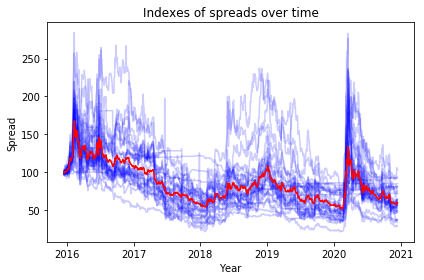

In [67]:
avg_spread = df_spreads[company_names].mean(axis=1)

index_avg_spread = 100*avg_spread/avg_spread[0]

fig = plt.figure(figsize=(6,4))
for company_name in company_names:
    index = 100*df_spreads[company_name]/df_spreads[company_name][0]
#     ax1.plot(df_spreads['Date'], df_spreads[company_name], alpha=0.2, color='blue')
    plt.plot(df_spreads['Date'], index, alpha=0.2, color='blue')
plt.plot(df_spreads['Date'], index_avg_spread, color='red')
plt.ylabel('Spread')
plt.xlabel('Year')
plt.title('Indexes of spreads over time')
plt.tight_layout()
plt.savefig('Figures/spreads_indexes.png', bbox_inches='tight', dpi=150)
plt.show()

In [68]:
for i,date in enumerate(df_SP500['Date']):
    timestamp = datetime.strptime(date, '%b %d, %Y')
    df_SP500['Date'][i] = timestamp

c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


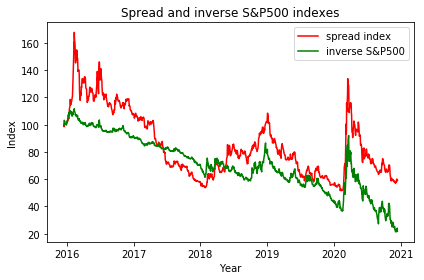

In [69]:
index_SP500 = 100-100*df_SP500['Close']/df_SP500['Close'][0] + 100

plt.figure(figsize=(6,4))
plt.plot(df_spreads['Date'], index_avg_spread, color='red', label='spread index')
plt.plot(df_SP500['Date'], index_SP500, color='green', label='inverse S&P500')
plt.legend()
plt.ylabel('Index')
plt.xlabel('Year')
plt.title('Spread and inverse S&P500 indexes')
plt.tight_layout()
plt.savefig('Figures/spread_SP500_indexes.png', bbox_inches='tight', dpi=150)
plt.show()

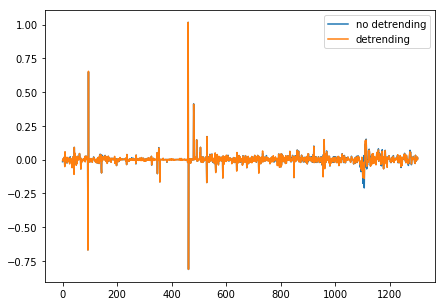

In [70]:
no_detrend_logret = np.log(df_spreads['AMROBK']/df_spreads['AMROBK'].shift(-1))
SP500_logret = np.log(df_SP500['Close']/df_SP500['Close'].shift(-1))

plt.figure(figsize=(7,5))
plt.plot(range(len(no_detrend_logret)), no_detrend_logret, label='no detrending')
plt.plot(range(len(df_spreads_detrended['AMROBK'])), df_spreads_detrended['AMROBK'], label='detrending')
plt.legend()
plt.show()

In [71]:
# print(no_detrend_logret['AMROBK'][100:200])

plt.figure(figsize=(7,5))
plt.plot(range(len(no_detrend_logret[100:200])), no_detrend_logret[100:200], label='no detrending')
plt.plot(df_SP500['Date'][100:200], SP500_logret[100:200], label='S&P 500')
plt.legend()
plt.show()

ValueError: view limit minimum -36811.85 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [72]:
df_R_pearson = pd.read_csv('R_scores/R_score_pearson.csv')
df_R_pearson_detrended = pd.read_csv('R_scores/R_score_Pearson_detrended.csv')
df_R_pearson_detrended_movingbeta = pd.read_csv('R_scores/R_score_Pearson_detrended_movingbeta.csv')

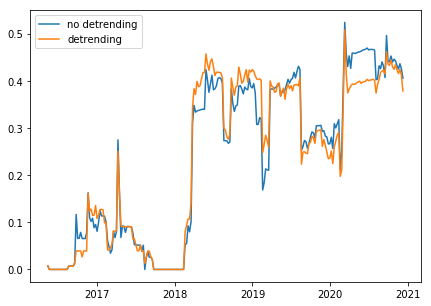

In [73]:
plt.figure(figsize=(7,5))
plt.plot(timestamp_R(df_R_pearson), df_R_pearson['AMROBK'], label='no detrending')
plt.plot(timestamp_R(df_R_pearson_detrended), df_R_pearson_detrended['AMROBK'], label='detrending')
plt.legend()
plt.show()

In [74]:
df_R_pearson_timelag = pd.read_csv('R_scores/R_score_Pearson_timelag.csv')
df_R_pearson_timelag_detrended = pd.read_csv('R_scores/R_score_pearson_timelag_detrended.csv')
df_R_pearson_timelag_detrended_movingbeta = pd.read_csv('R_scores/R_score_pearson_timelag_detrended_movingbeta.csv')

In [75]:
df_R_granger = pd.read_csv('R_scores/R_score_Granger.csv')
df_R_granger_detrended = pd.read_csv('R_scores/R_score_granger_detrended.csv')
df_R_granger_detrended_movingbeta = pd.read_csv('R_scores/R_score_granger_detrended_movingbeta.csv')

In [76]:
df_R_granger_detrended.head()

,Unnamed: 0,DBR,AMROBK,BACR-Bank,BNP,BYLAN,CMZB,CSGAG,DB,DZBK,...,BACF-BankNA,C,CRDSUI-USAInc,GS,JPM,MWD,RY,MIZUHBA,NOMURA,Date
0,0,1.0,0.100322,0.007778,0.337561,0.338039,0.179532,0.347882,0.336242,0.307132,...,0.123106,0.034694,0.276178,0.014947,0.290111,0.269466,0.282745,0.070922,0.052345,16-05-16
1,1,1.0,0.096836,0.007213,0.335793,0.336425,0.179055,0.346522,0.333602,0.306859,...,0.069213,0.035967,0.275590,0.015097,0.288857,0.265847,0.280852,0.072044,0.056500,23-05-16
2,2,1.0,0.110540,0.007191,0.344822,0.339470,0.187996,0.349261,0.335014,0.309362,...,0.057404,0.036629,0.277588,0.014366,0.288567,0.265935,0.281905,0.085109,0.066462,30-05-16
3,3,1.0,0.107277,0.007186,0.347837,0.345432,0.199218,0.351916,0.333352,0.310729,...,0.057594,0.036323,0.278511,0.015094,0.290774,0.266218,0.283604,0.154734,0.066185,06-06-16
4,4,1.0,0.106394,0.007109,0.342597,0.341374,0.184275,0.354174,0.335541,0.309966,...,0.058352,0.036457,0.270318,0.015502,0.282205,0.261859,0.276056,0.153270,0.064247,13-06-16


c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


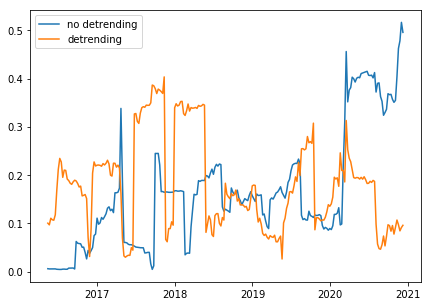

In [77]:
plt.figure(figsize=(7,5))
plt.plot(timestamp_R(df_R_granger), df_R_granger['AMROBK'], label='no detrending')
plt.plot(timestamp_R(df_R_granger_detrended), df_R_granger_detrended['AMROBK'], label='detrending')
plt.legend()
plt.show()

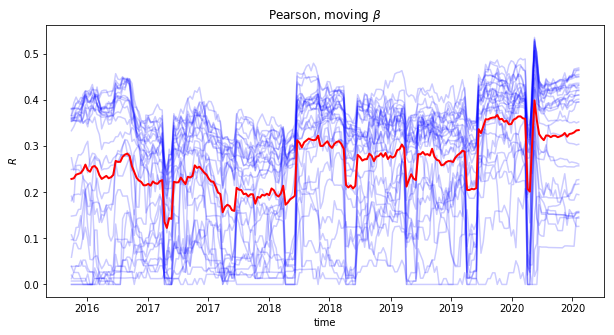

In [78]:
# Plot R scores and average R score for pearson
fig, ax = plt.subplots(figsize=(10,5))

for company_name in company_names:
    plt.plot(timestamp_R(df_R_pearson_detrended_movingbeta), 
             df_R_pearson_detrended_movingbeta[company_name], alpha=0.2, color='blue')

avg_R = np.mean(df_R_pearson_detrended_movingbeta[company_names], axis=1)
plt.plot(timestamp_R(df_R_pearson_detrended_movingbeta), avg_R, color='red', linewidth=2)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.ylabel(r'$R$')
plt.xlabel('time')
plt.title(r'Pearson, moving $\beta$')
plt.savefig('Figures/R_pearson_detrended_movingbeta.pdf', bbox_inches='tight')
plt.show()

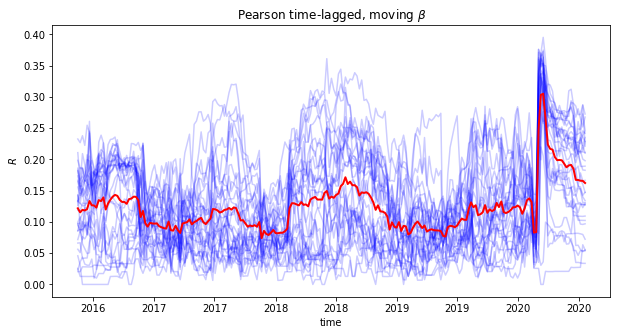

In [79]:
# Plot R scores and average R score for pearson
fig, ax = plt.subplots(figsize=(10,5))

for company_name in company_names:
    plt.plot(timestamp_R(df_R_pearson_timelag_detrended_movingbeta), 
             df_R_pearson_timelag_detrended_movingbeta[company_name], alpha=0.2, color='blue')

avg_R = np.mean(df_R_pearson_timelag_detrended_movingbeta[company_names], axis=1)
plt.plot(timestamp_R(df_R_pearson_timelag_detrended_movingbeta), avg_R, color='red', linewidth=2)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.ylabel(r'$R$')
plt.xlabel('time')
plt.title(r'Pearson time-lagged, moving $\beta$')
plt.savefig('Figures/R_pearson_timelag_detrended_movingbeta.pdf', bbox_inches='tight')
plt.show()

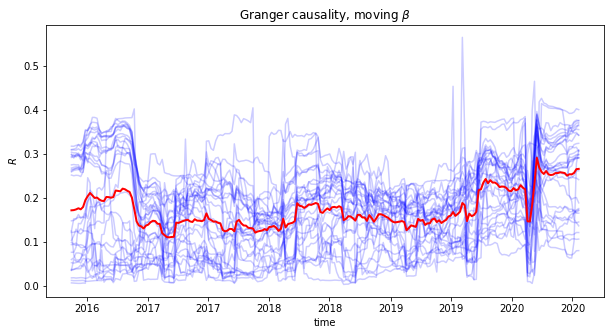

In [80]:
# Plot R scores and average R score for pearson
fig, ax = plt.subplots(figsize=(10,5))

for company_name in company_names:
    plt.plot(timestamp_R(df_R_granger_detrended_movingbeta), 
             df_R_granger_detrended_movingbeta[company_name], alpha=0.2, color='blue')

avg_R = np.mean(df_R_granger_detrended_movingbeta[company_names], axis=1)
plt.plot(timestamp_R(df_R_granger_detrended_movingbeta), avg_R, color='red', linewidth=2)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.ylabel(r'$R$')
plt.xlabel('time')
plt.title(r'Granger causality, moving $\beta$')
plt.savefig('Figures/R_granger_detrended_movingbeta.pdf', bbox_inches='tight')
plt.show()

No handles with labels found to put in legend.


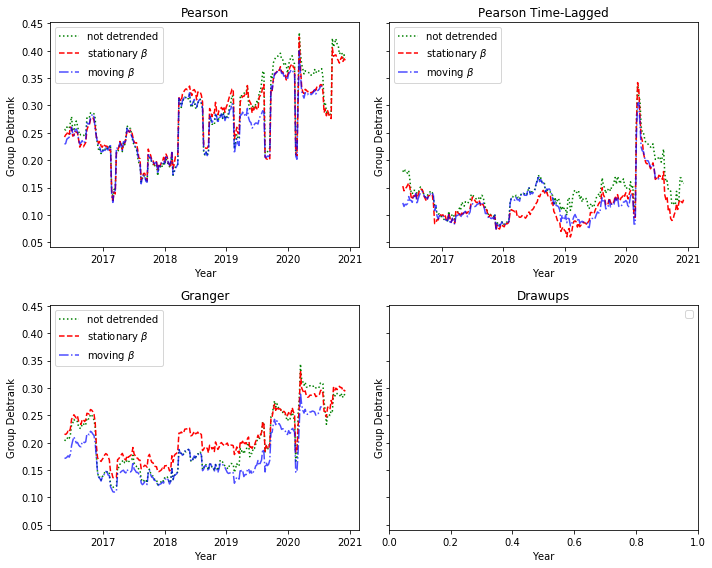

In [108]:
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2, figsize=(10,8), sharey=True)

pearson_avg_R = df_R_pearson[company_names].mean(axis=1)
pearson_avg_R_detrended = df_R_pearson_detrended[company_names].mean(axis=1)
pearson_avg_R_detrended_movingbeta = df_R_pearson_detrended_movingbeta[company_names].mean(axis=1)
ax1.plot(timestamp_R(df_R_pearson), 
         pearson_avg_R, label='not detrended', color='green', linestyle='dotted')
ax1.plot(timestamp_R(df_R_pearson_detrended), 
         pearson_avg_R_detrended, label=r'stationary $\beta$', color='red', linestyle='--')
ax1.plot(timestamp_R(df_R_pearson_detrended_movingbeta), 
         pearson_avg_R_detrended_movingbeta, label=r'moving $\beta$', color='blue', linestyle='dashdot', alpha=0.7)
ax1.set_xlabel('Year')
ax1.set_ylabel('Group Debtrank')
ax1.set_title('Pearson')
ax1.legend()

pearson_timelag_avg_R = df_R_pearson_timelag[company_names].mean(axis=1)
pearson_timelag_avg_R_detrended = df_R_pearson_timelag_detrended[company_names].mean(axis=1)
pearson_timelag_avg_R_detrended_movingbeta = df_R_pearson_timelag_detrended_movingbeta[company_names].mean(axis=1)
ax2.plot(timestamp_R(df_R_pearson_timelag), 
         pearson_timelag_avg_R, label='not detrended', color='green', linestyle='dotted')
ax2.plot(timestamp_R(df_R_pearson_timelag_detrended), 
         pearson_timelag_avg_R_detrended, label=r'stationary $\beta$', color='red', linestyle='--')
ax2.plot(timestamp_R(df_R_pearson_timelag_detrended_movingbeta), 
         pearson_timelag_avg_R_detrended_movingbeta, label=r'moving $\beta$', color='blue', linestyle='dashdot', alpha=0.7)
ax2.set_xlabel('Year')
ax2.set_ylabel('Group Debtrank')
ax2.set_title('Pearson Time-Lagged')
ax2.legend()

granger_avg_R = df_R_granger[company_names].mean(axis=1)
granger_avg_R_detrended = df_R_granger_detrended[company_names].mean(axis=1)
granger_avg_R_detrended_movingbeta = df_R_granger_detrended_movingbeta[company_names].mean(axis=1)
ax3.plot(timestamp_R(df_R_granger), 
         granger_avg_R, label='not detrended', color='green', linestyle='dotted')
ax3.plot(timestamp_R(df_R_granger_detrended), 
         granger_avg_R_detrended, label=r'stationary $\beta$', color='red', linestyle='--')
ax3.plot(timestamp_R(df_R_granger_detrended_movingbeta), 
         granger_avg_R_detrended_movingbeta, label=r'moving $\beta$', color='blue', linestyle='dashdot', alpha=0.7)
ax3.set_xlabel('Year')
ax3.set_ylabel('Group Debtrank')
ax3.set_title('Granger')
ax3.legend()

# ax4.set_title('Methods combined (detrended)')
# ax4.set_xlabel('Year')
# ax4.set_ylabel('Group Debtrank')
# ax4.plot(timestamp_R(df_R_pearson_detrended), pearson_avg_R_detrended, label='Pearson', color='orange')
# ax4.plot(timestamp_R(df_R_pearson_timelag_detrended), pearson_timelag_avg_R_detrended, label='Pearson timelag', color='purple')
# ax4.plot(timestamp_R(df_R_granger_detrended), granger_avg_R_detrended, label='Granger', color='red')
# # ax4.plot(timestamp_R(df_R_pearson), pearson_avg_R, label='Pearson', color='orange')
# # ax4.plot(timestamp_R(df_R_pearson_timelag), pearson_timelag_avg_R, label='Pearson timelag', color='purple')
# # ax4.plot(timestamp_R(df_R_granger), granger_avg_R, label='Granger', color='red')
# ax4.legend()
ax4.set_xlabel('Year')
ax4.set_ylabel('Group Debtrank')
ax4.set_title('Drawups')
ax4.legend()


plt.tight_layout()
# plt.savefig('Figures/R_comparisson_overtime.png', bbox_inches='tight', dpi=200)
plt.show()

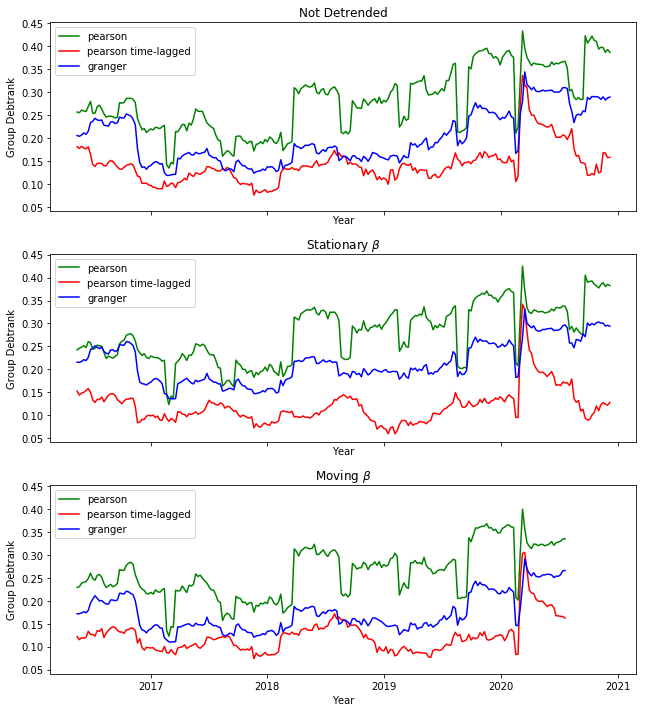

In [107]:
fig, [ax1, ax2, ax3] = plt.subplots(3,1,figsize=(9,10), sharex=True, sharey=True)

ax1.plot(timestamp_R(df_R_pearson), 
         pearson_avg_R, label='pearson', color='green')
ax1.plot(timestamp_R(df_R_pearson_timelag), 
         pearson_timelag_avg_R, label='pearson time-lagged', color='red')
ax1.plot(timestamp_R(df_R_granger), 
         granger_avg_R, label='granger', color='blue')

ax1.set_xlabel('Year')
ax1.set_ylabel('Group Debtrank')
ax1.set_title('Not Detrended')
ax1.legend()

ax2.plot(timestamp_R(df_R_pearson_detrended), 
         pearson_avg_R_detrended, label='pearson', color='green')
ax2.plot(timestamp_R(df_R_pearson_timelag_detrended), 
         pearson_timelag_avg_R_detrended, label='pearson time-lagged', color='red')
ax2.plot(timestamp_R(df_R_granger_detrended), 
         granger_avg_R_detrended, label='granger', color='blue')

ax2.set_xlabel('Year')
ax2.set_ylabel('Group Debtrank')
ax2.set_title(r'Stationary $\beta$')
ax2.legend()

ax3.plot(timestamp_R(df_R_pearson_detrended_movingbeta), 
         pearson_avg_R_detrended_movingbeta, label='pearson', color='green')
ax3.plot(timestamp_R(df_R_pearson_timelag_detrended_movingbeta), 
         pearson_timelag_avg_R_detrended_movingbeta, label='pearson time-lagged', color='red')
ax3.plot(timestamp_R(df_R_granger_detrended_movingbeta), 
         granger_avg_R_detrended_movingbeta, label='granger', color='blue')
ax3.set_xlabel('Year')
ax3.set_ylabel('Group Debtrank')
ax3.set_title(r'Moving $\beta$')
ax3.legend()

plt.tight_layout()
plt.show()

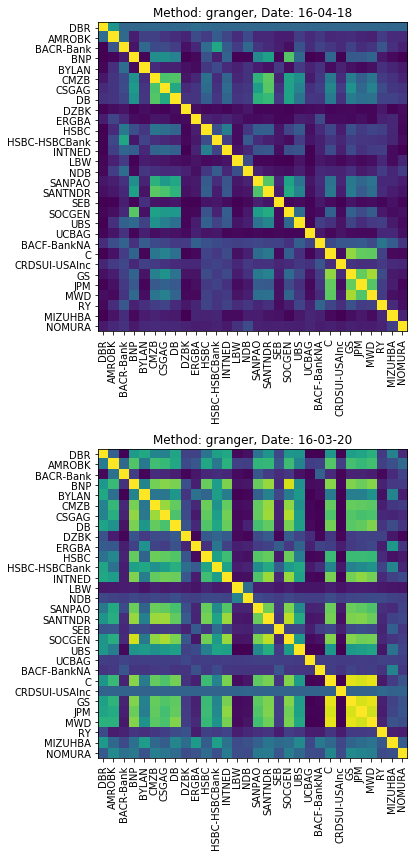

In [82]:
# Open weights

methods = ['pearson', 'pearson_timelag', 'granger']
methods = ['granger']

for method in methods:
    fig, [ax1,ax2] = plt.subplots(2,1, figsize=(6,12))
    
    df_W = pd.read_csv(f'W_timeseries/W_{method}.csv')
    
    W1 = np.array(df_W.iloc[100].values[2:].tolist()).reshape(len(company_names), len(company_names))
    W2 = np.array(df_W.iloc[200].values[2:].tolist()).reshape(len(company_names), len(company_names))

    im1 = ax1.imshow(W1)
    ax1.set_title(f'Method: {method}, Date: '+df_W.iloc[100]['Date'])
    
    plt.sca(ax1)
    plt.yticks(ticks=range(W1.shape[0]), labels=company_names)
    plt.xticks(range(W1.shape[1]), labels=company_names, rotation=90)
    
    im2 = ax2.imshow(W2)
    ax2.set_title(f'Method: {method}, Date: '+df_W.iloc[200]['Date'])
    plt.sca(ax2)
    plt.yticks(ticks=range(W1.shape[0]), labels=company_names)
    plt.xticks(range(W1.shape[1]), labels=company_names, rotation=90)
    
    plt.tight_layout()
    plt.savefig(f'Figures/corrmat_{method}.png', bbox_inches='tight', dpi=200)
    plt.show()